In [1]:
import numpy as np
from matplotlib import pyplot as plt

L=1
Nx=101
D=10**(-6)
dt=50*D
t_final=5000000*D
x_ax=np.linspace(0,L+L/(Nx-1),Nx+1)
dx=x_ax[1]-x_ax[0]
t_ax=np.arange(0,t_final+dt,dt)
print(dx,dt)

bcdl=1
bcdr=0
C0=0
grid=np.zeros((len(t_ax),len(x_ax)))
grid[:,0]=bcdl
s=dt/(dx**2)
print(s)




0.01 4.9999999999999996e-05
0.49999999999999994


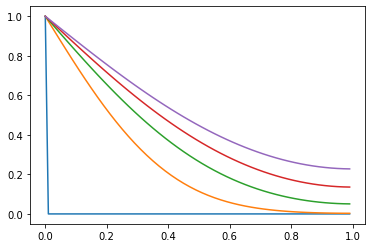

In [2]:
for t in range(len(t_ax)-1):
    for x in range(1,len(x_ax)-1):
        grid[t+1,x]=grid[t,x]+s*(grid[t,x-1]-2*grid[t,x]+grid[t,x+1])
        grid[t+1,-1]=grid[t+1,-3]
    if(t%1000==0 and t<5000):
        plt.plot(x_ax[0:Nx-1],grid[t,0:Nx-1])

In [3]:
def analytic(x, t):
    result = 1
    for n in range(1001):
        result -= 2*(-1)**n/((n+0.5)*np.pi)*np.cos((n+0.5)*np.pi*(1-x))*np.exp(-(n+1/2)**2*np.pi*np.pi*t)
    return result

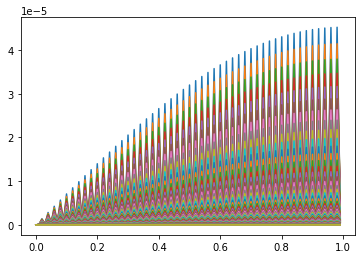

In [4]:
for t in range(len(t_ax)-1):
    if(t%1000==0 and t>10000):
        plt.plot(x_ax[0:Nx-1],grid[t,0:Nx-1]-analytic(x_ax[0:Nx-1],t*dt))

In [5]:
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    '''
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    #xc[0]=1
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

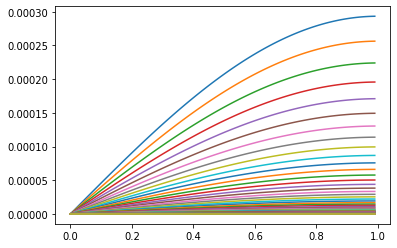

In [13]:
a=np.full(Nx-1,-s)
a[-1]+=-s
b=np.full(Nx,(1+2*s))
b[0]=1
c=np.full(Nx-1,-s)
c[0]=0
d=grid[0,0:-1]
for t in range(len(t_ax)-1):
    d=TDMAsolver(a,b,c,d)
    d[0]=1
    if(t%1000==0 and t>100000):
        #plt.plot(x_ax[0:Nx],d)
        plt.plot(x_ax[0:Nx-1],d[0:Nx-1]-analytic(x_ax[0:Nx-1],t*dt))
    

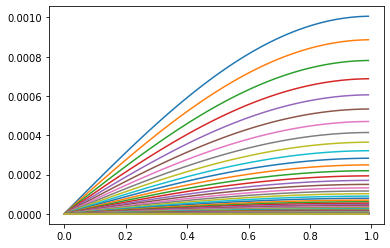

In [21]:
a=np.full(Nx-1,-s)
a[-1]+=-s
b=np.full(Nx,(1+2*s))
b[0]=1
c=np.full(Nx-1,-s)
c[0]=0
d=grid[0,0:-1]
for i in range(1,len(d)-2):
    d[i]=s*d[i-1]+(1-2*s)*d[i]+s*d[i+1]
d[-1]=2*s*d[-2]+(1-2*s)*d[-1]
for t in range(len(t_ax)-1):
    
    d=TDMAsolver(a,b,c,d)
    d[0]=1
    if(t%1000==0 and t>10000):
        #plt.plot(x_ax[0:Nx],d)
        plt.plot(x_ax[0:Nx-1],d[0:Nx-1]-analytic(x_ax[0:Nx-1],t*dt))

In [12]:
print(len(t_ax))

100001
